This lab is on the paper "On Causal and Anticausal Learning" by Bernhard Schölkopf et al. 2016 https://arxiv.org/abs/1206.6471.

Given a dataset with join probability distribution P(X,Y), if the mechanism P(Y|X) is independent of P(X), having a better estimation of P(X) does not improve estimation of the mechanism P(Y|X). On the other hand if the mechanism is not independent of P(X), then samples from P(X) can help improve the estimation of the mechanism. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor


In the following cell, a dataset is generated in a way that P(Y|X) is not independent of P(X).

In [2]:

# Step 1: Generate two Gaussian distributions for X
np.random.seed(0)
size_per_mode = 10000

# Mode 1 for X
X_mode1 = np.random.normal(loc=-2.0, scale=2, size=size_per_mode)
# Mode 2 for X
X_mode2 = np.random.normal(loc=2.0, scale=2, size=size_per_mode)

# Combine into one dataset
X = np.concatenate([X_mode1, X_mode2]).reshape(-1, 1)

# Step 2: Define P(Y|X) differently for each mode
# Let's make Y more likely to be 1 in mode 1, and 0 in mode 2
Y_mode1 = np.random.choice([0, 1], size=size_per_mode, p=[0.3, 0.7])  # More likely to be 1
Y_mode2 = np.random.choice([0, 1], size=size_per_mode, p=[0.7, 0.3])  # More likely to be 0



Y = np.concatenate([Y_mode1, Y_mode2]).astype(int)

# Combine into one dataset
Y = np.concatenate([Y_mode1, Y_mode2])


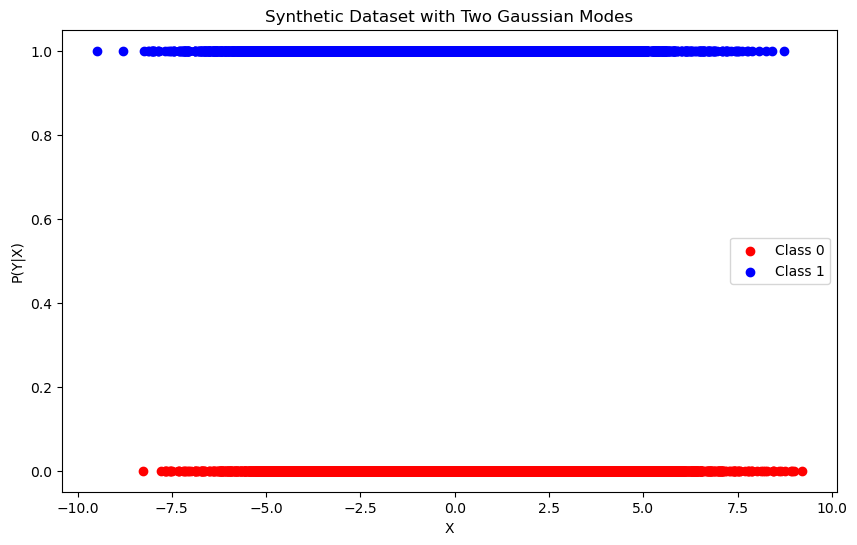

In [3]:

# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[Y==0], Y[Y==0], color='red', label='Class 0')
plt.scatter(X[Y==1], Y[Y==1], color='blue', label='Class 1')
plt.legend()
plt.xlabel('X')
plt.ylabel('P(Y|X)')
plt.title('Synthetic Dataset with Two Gaussian Modes')
plt.show()


In the following cell, some samples are selected to be laballed and rest are unlablled. This is done so that we can apply both superwised learning and semi-superwised learning and check if knowing information about the unlabelled part, can improve the estmiation of mechanism. 

In [4]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=21)

# Assume that only a portion of the training set is labeled
num_labeled = int(size_per_mode/100)
# train_indices = np.random.choice(range(X_train.shape[0]), size=num_labeled, replace=False)

idx1 = np.where((X_train>0) & (X_train<2))[0]
idx2 = np.where((X_train<0) & (X_train>-2))[0]
train_indices = np.concatenate((idx1,idx2))
train_indices = np.random.choice(len(train_indices),num_labeled,replace=False)

X_labeled = X_train[train_indices]
y_labeled = y_train[train_indices]

# Create the full training set for Label Propagation with unlabeled data marked as -1
y_train_full = -np.ones(len(X_train))
y_train_full[train_indices] = y_labeled



Label Propagation algorithm is a semi-supervised learning approach that leverages both labeled and unlabeled data to learn the structure of the data and predict labels for the unlabeled points. Its operation is based on the assumption that similar data points are likely to have the same label. The algorithm works by propagating labels through the dataset via the network of data points, effectively spreading the known labels to the unlabeled data based on their similarities. 

The following cell shows how you can apply the algotrithm 
https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html

In [9]:
from sklearn import datasets
label_prop_model = LabelPropagation(max_iter=2000)
iris = datasets.load_iris()
rng = np.random.RandomState(42)
random_unlabeled_points = rng.rand(len(iris.target)) < 0.3
labels = np.copy(iris.target)
labels[random_unlabeled_points] = -1
label_prop_model.fit(iris.data, labels)

LabelPropagation(max_iter=2000)

<div class="alert alert-block alert-warning">
    
Task1: apply Label Propagation on X_labeled, y_labeled and report the result on test set

</div>


In [10]:
from sklearn.metrics import classification_report
#TODO
# Apply Label Propagation on X_labeled, y_labeled and report the result on test set
label_prop_model.fit(X_labeled, y_labeled)
# Predict labels for the test set
y_pred_test = label_prop_model.predict(X_test)

# Report the result on the test set
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.59      0.67      0.63      3018
           1       0.62      0.53      0.57      2982

    accuracy                           0.60      6000
   macro avg       0.61      0.60      0.60      6000
weighted avg       0.61      0.60      0.60      6000



<div class="alert alert-block alert-warning">
    
Task2: apply Label Propagation on X_train, y_train_full and report the result on test set. Compare the result with the supervised setting in task 1.

</div>

In [11]:
#TODO
# Apply Label Propagation on X_train, y_train_full and report the result on test set
label_prop_model.fit(X_train, y_train_full)

# Predict labels for the test set
y_pred_test_lp = label_prop_model.predict(X_test)

# Report the result on the test set using Label Propagation
print("Classification Report on Test Set using Label Propagation:")
print(classification_report(y_test, y_pred_test_lp))


Classification Report on Test Set using Label Propagation:
              precision    recall  f1-score   support

           0       0.61      0.72      0.66      3018
           1       0.66      0.54      0.59      2982

    accuracy                           0.63      6000
   macro avg       0.64      0.63      0.63      6000
weighted avg       0.64      0.63      0.63      6000



In [12]:
#I had to increase max itr to converge label prop. 
#The results are slightly better, as shown by precision, recall and accuracy, because pyx and px are dependent.

<div class="alert alert-block alert-warning">
    
Task3: 

- Change the data generation process in a way that P(Y|X) is independent of P(X)
- apply Labal Propation in supervised setting
- apply Labal Propation in semi-supervised setting
- compare the results

</div>

In [13]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import classification_report

# Generate synthetic data where X and Y are independent
X, Y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Supervised setting
label_prop_supervised = LabelPropagation()
label_prop_supervised.fit(X_train, y_train)
y_pred_supervised = label_prop_supervised.predict(X_test)
print("Classification Report in Supervised Setting:")
print(classification_report(y_test, y_pred_supervised))

# Semi-supervised setting
# Assume that only a portion of the training set is labeled
num_labeled = int(0.1 * len(y_train))
rng = np.random.RandomState(42)
train_indices = rng.choice(len(X_train), size=num_labeled, replace=False)

X_labeled = X_train[train_indices]
y_labeled = y_train[train_indices]

# Create the full training set for Label Propagation with unlabeled data marked as -1
y_train_full = -np.ones(len(y_train))
y_train_full[train_indices] = y_labeled

label_prop_semisupervised = LabelPropagation()
label_prop_semisupervised.fit(X_train, y_train_full)
y_pred_semisupervised = label_prop_semisupervised.predict(X_test)
print("\nClassification Report in Semi-supervised Setting:")
print(classification_report(y_test, y_pred_semisupervised))


Classification Report in Supervised Setting:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       145
           1       0.80      0.70      0.74       155

    accuracy                           0.75       300
   macro avg       0.76      0.76      0.75       300
weighted avg       0.76      0.75      0.75       300


Classification Report in Semi-supervised Setting:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       145
           1       0.74      0.71      0.73       155

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [ ]:
#Sligthly worse because pyx and px are independent, or just seems to support claims from the paper.

---

In the second part, we want to apply the same concept for a regression task. 
In the following cell, a synthetic data for regression is generated in a way that P(Y|X) is dependent on P(X).

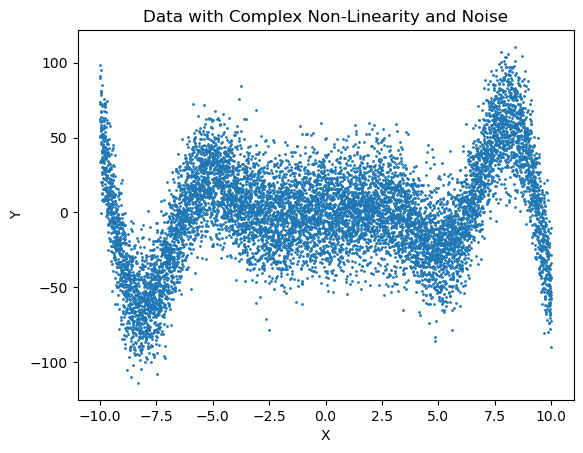

In [15]:
np.random.seed(0)

size = 10000
X = np.linspace(-10, 10, size).reshape(-1, 1)
# Introducing a more complex relationship and larger noise
Y = np.sin(X) * X**2 + np.random.normal(0, 20, size).reshape(-1, 1)

# Visualize the data
plt.scatter(X, Y, s=1)
plt.title("Data with Complex Non-Linearity and Noise")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Assume only a very small portion of the training set is labeled
num_labeled = int(0.1 * len(X_train)) # Using only 5% as labeled
indices = np.random.choice(range(X_train.shape[0]), size=num_labeled, replace=False)
X_labeled = X_train[indices]
X_unlabeled = np.delete(X_train, indices, axis=0)
Y_labeled = Y_train[indices]

<div class="alert alert-block alert-warning">
    
Task 4: train RandomForestRegressor on X_labeled, y_labeled and report the result on test set

</div>

In [17]:
#TODO
# Apply RandomForestRegressor on X_labeled, y_labeled and report the result on test set
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train RandomForestRegressor on labeled data
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_labeled, Y_labeled.ravel())

# Predict on test set
Y_pred = rf_regressor.predict(X_test)

# Report the result on the test set
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error on Test Set:", mse)


Mean Squared Error on Test Set: 558.8095231966446


<div class="alert alert-block alert-warning">
    
Task 5: 

- use the trained model in task 4 to predict labels for X_unlabeled
- train a new RandomForestRegressor on the original labelled data (X_labeled) and pseudolabelled data. Then report the results of the test set
- compare the result with result of tast 4

</div>

In [18]:
#TODO
# use the trained model in task 4 to predict labels for X_unlabeled
#TODO
# train a new RandomForestRegressor on the original labelled data (X_labeled) and pseudolabelled data. Then report the results of the test set

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Predict labels for X_unlabeled using the trained model from Task 4
Y_unlabeled_pred = rf_regressor.predict(X_unlabeled)

# Combine the original labeled data with the pseudo-labeled data
X_combined = np.concatenate((X_labeled, X_unlabeled))
Y_combined = np.concatenate((Y_labeled.ravel(), Y_unlabeled_pred))

# Train a new RandomForestRegressor on the combined data
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_combined, Y_combined)

# Predict on test set
Y_pred_combined = rf_regressor_combined.predict(X_test)

# Report the result on the test set
mse_combined = mean_squared_error(Y_test, Y_pred_combined)
print("Mean Squared Error on Test Set with Pseudo-labeling:", mse_combined)


Mean Squared Error on Test Set with Pseudo-labeling: 567.2950737043808


In [10]:
#TODO
# compare the result with result of task 4
#In the case of the less dependent data, the error is slightly larger. So like before, the higher dependency caused the prediction to be improved.